# combine multiple files

for some reason 19011713 isn't creating a beam group? it's the 'first' on in the list, and for some reason the `combine_opt` seems to do something different with the first file?

### NEED TO SORT IN ORDER FOR SOME REASON???

In [1]:
import glob

from echopype.convert import Convert
from echopype import Process

import matplotlib.pyplot as plt

import xarray as xr

In [15]:
raw_files = glob.glob('./data/1901171*.01A')

raw_files.sort()
raw_files

['./data/19011710.01A',
 './data/19011711.01A',
 './data/19011712.01A',
 './data/19011713.01A',
 './data/19011714.01A',
 './data/19011715.01A',
 './data/19011716.01A',
 './data/19011717.01A',
 './data/19011718.01A',
 './data/19011719.01A']

In [16]:

dc = Convert(raw_files, './data/NLB_test.XML')                        # create a Convert object
dc.raw2nc(combine_opt=True, save_path='./combined_file.nc')

09:16:59 converting file 19011710.01A with NLB_test.XML, time of first ping 2019-Jan-17 10:00:02
09:16:59 converting file 19011711.01A with NLB_test.XML, time of first ping 2019-Jan-17 11:00:00
09:17:00 converting file 19011712.01A with NLB_test.XML, time of first ping 2019-Jan-17 12:19:54
09:17:01 converting file 19011713.01A with NLB_test.XML, time of first ping 2019-Jan-17 13:54:40
09:17:01 converting file 19011714.01A with NLB_test.XML, time of first ping 2019-Jan-17 14:00:01
09:17:02 converting file 19011715.01A with NLB_test.XML, time of first ping 2019-Jan-17 15:17:28
09:17:03 converting file 19011716.01A with NLB_test.XML, time of first ping 2019-Jan-17 16:00:02
09:17:03 converting file 19011717.01A with NLB_test.XML, time of first ping 2019-Jan-17 17:30:06
09:17:04 converting file 19011718.01A with NLB_test.XML, time of first ping 2019-Jan-17 18:00:00
09:17:04 converting file 19011719.01A with NLB_test.XML, time of first ping 2019-Jan-17 19:00:01


In [17]:
from echopype import Process
# nc_path = fname + '.nc'  # path to a converted nc file
# nc_path =glob.glob('./*.nc') # try to look at many files
ed = Process('combined_file.nc')   # create a processing object
ed.temperature = -1   # temperature in degree Celsius
ed.salinity = 34.5     # salinity in PSU
ed.pressure = 50     # pressure in dbar
ed.recalculate_environment()  # recalculate related parameters

ed.calibrate()           # Sv
ed.remove_noise()        # denoise
ed.get_MVBS()  

Initialize using average temperature recorded by instrument
09:25:01  calibrating data in combined_file.nc
09:25:03  Remove noise from Sv stored in memory.
09:25:07  use Sv stored in memory to calculate MVBS


<ipython-input-18-bb1379faeaa1>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Sv.ping_time , Sv.range,  Sv.Sv.T , vmin=-70, vmax = -40  )
<ipython-input-18-bb1379faeaa1>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Sv.ping_time , Sv.range,  Sv.Sv.T , vmin=-70, vmax = -40  )
<ipython-input-18-bb1379faeaa1>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  E

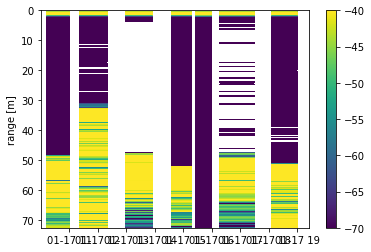

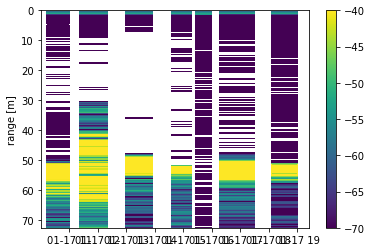

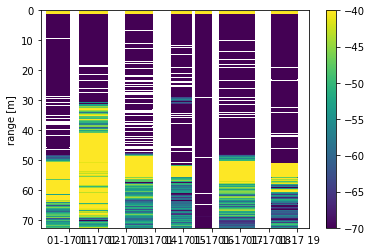

In [18]:
for f in ed.Sv_clean.frequency:
    plt.figure()
    
    Sv = ed.Sv_clean.sel(frequency = f)
    plt.pcolormesh(Sv.ping_time , Sv.range,  Sv.Sv.T , vmin=-70, vmax = -40  )
    plt.ylim([ Sv.range.max() , 0])
    plt.ylabel('range [m]')
    plt.colorbar()

<ipython-input-32-6aae2f327213>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Sv.ping_time , Sv.range ,   Sv.Sv.T   )


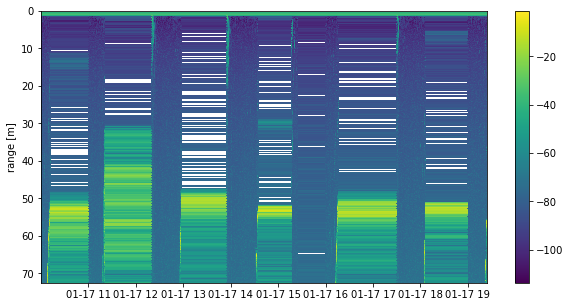

In [32]:
plt.figure(figsize=(10,5))
Sv = ed.Sv_clean.sel(frequency = f)
plt.pcolormesh(Sv.ping_time , Sv.range ,   Sv.Sv.T   )
plt.ylim([ Sv.range.max() , 0])
plt.ylabel('range [m]')
# plt.xlim([ 500, 1000])
plt.colorbar()

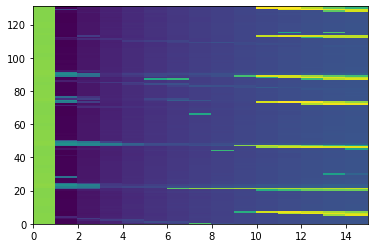

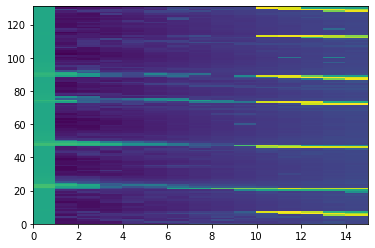

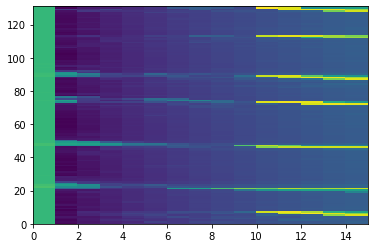

In [19]:
for f in ed.MVBS.frequency:
    plt.figure()
    plt.pcolormesh(ed.MVBS.MVBS.sel(frequency = f)  )

In [4]:
converted = glob.glob('./*.nc')
ds = xr.open_mfdataset(converted,  group='Beam' )
ds

ValueError: Resulting object does not have monotonic global indexes along dimension ping_time

# `open_mfdataset` doesn't want to work with groups

`open_dataset` finds the groups, but not `mf`

In [ ]:
ds = xr.open_mfdataset('.echopype_tmp/19*.nc', group='Beam')
# xr.open_mfdataset('.echopype_tmp/19011719.nc', group='Beam')

In [ ]:
for f in ds.frequency:
    plt.figure()
    plt.pcolormesh(ds.ping_time, ds.range_bin, ds.backscatter_r.sel(frequency = f).T ) 